In [1]:
%load_ext watermark
%watermark -v -m -p numpy,scipy,pandas,matplotlib,sklearn,keras

Using TensorFlow backend.


CPython 3.5.2
IPython 6.2.1

numpy 1.14.2
scipy 1.0.1
pandas 0.22.0
matplotlib 2.2.2
sklearn 0.19.1
keras 2.1.5

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.9.89-boot2docker
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit


In [2]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           3950         223        3250         227         477        3259
Swap:          1874           0        1874


In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from ipywidgets import Image
from io import StringIO
import pydotplus 
from sklearn.tree import export_graphviz

In [4]:
import time
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(100)):
    time.sleep(0.05)

HBox(children=(IntProgress(value=0), HTML(value='')))

In [5]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
pd.DataFrame(X, columns=cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
import xgboost, lightgbm

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
xgb = xgboost.XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)
prediction = xgb.predict_proba(X_test)

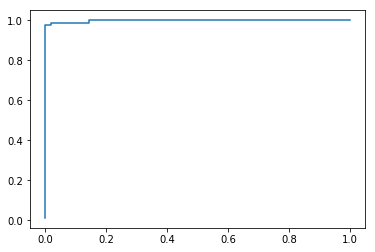

In [8]:
fpr, tpr, _ = roc_curve(y_test, prediction[:,1])
plt.plot(fpr, tpr);

In [9]:
import fbprophet

In [10]:
!vw --version

8.5.0


In [12]:
import keras

In [13]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [14]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, y_train)

In [15]:
dot_data = StringIO()
export_graphviz(tree, feature_names=cancer.feature_names, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x8d\x00\x00\x01\xf1\x08\x02\x00\x00\x00or\xdb~\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddu\\\x94\xd9\x1a\x07\xf0\x87\xee.IE\x05\x15\x0cT\x14\xc5\xc6nE\xc1\xc0\xb5\x16\xb1\xd7\x15\x1b\xbb\xdb\xb5W\\cm\x10\xc5.D\xda\xa0\x0c\x14\xc5FD\x9a\x81\xa1c\x98\xb9\x7f\xbc\xde\xd9\x91\x1c\x04\x19\xe2\xf7\xfd\xdc?f\xce\x9cx\xce\xcc\xdce\x1e\xcfy\xcf+\xc6\xe3\xf1\x08\x00\x00\x00\x00\x00\x00j\rqQ\x07\x00\x00\x00\x00\x00\x00\x00?@\x9e\x06\x00\x00\x00\x00\x00P\xbb O\x03\x00\x00\x00\x00\x00\xa8]$E\x1d\x00\x00\x00\xd4\x13\xd1\xd1\xd1\xa1\xa1\xa1\xa2\x8e\x02\xa0\x1e\x92\x90\x90\x182d\x88\xac\xac\xac\xa8\x03\x01\x80\x9a#\x86sD\x00\x00\xa0ZL\x980\xc1\xcd\xcdM\xd4Q\x00\xd4O\x97/_\xb6\xb5\xb5\x15u\x14\x00Ps\xb0\x9e\x06\x00\x00\xd5\xa3\xa8\xa8\xa8\xeb\xc0\xd1\xce{\xce\x88:\x10\x80\xfa\xc6\xce\\\x91\xc3\xe1\x88:\n\x00\xa8Q\xb8>\r\x00\x00\x00\x00\x00\xa0vA\x9e\x06\x00\x00\x00\x00\x00P\xbb O\x03\x00\x00\x00\x00\x00\xa8]\x90\xa7\x01\x00\x00\x00\x00\x00\xd4.\xc8\xd3\x00\x00\x00\x00\x00\x00j\x17\x9c\xf7\x08\x00\x00\x00\xf5\x01\x8f\xcb\xf5\xbf~\xfe\xc2\xfe\r\xac\xc48\x8f\xc8\xac\x9f\xae\xc3\xf7>"t\xd5\xa4~\xdc\xa2\xa2\nk\n\xd3\xca\xce\\\xb1d\xe5J\xf5\x0c\x00\r\n\xf24\x00\x00\x00\xd1[\xfd[\x7f"\xdax\xe6\xbe\xa8\x03\xa9\xab^<zpf\xe7Jy%eVb\\U\xea\xf0\x15\xe4\xe5\x1etq\xe2\x16\x15U*\x8c\x9fk\x05\x00P\x12\xf24\x00\x00h\xb8\x98%\x8e\xda\xb0\xa6\xc1\xe3rkf\xa0\xda3\xe5\xeaub\xcbb\x87\x85\x1b:\xf7\x1d^\xea\xb2\x95\xf0u\xf8\xce\xed]\xdb\xd4\xac}\xdc\xe7\xf7\x95\n\xa3\xfcV\xf5\xefm\x07\x80_\x07y\x1a\x00\x00\x80\xe8m:\xf7@\xd4!\xd4\x90\x94\xf8\xafA\xb7=\x02o\xba\xef\xbe\x12\\\x8d\xdd\xee\xb9\x16*!Q\xc1\xaf\x1aa\xea0^\x87\x06\x05{]\xdb}58\xe8\xd6E\xe1c\xf8\xb9V\x00\x00\xa5B\x9e\x06\x00\x00\x00\xbf\\\x16;\xed\xf1=\xcf\xc0\x9b\xeeQO\x1f\x8b\x89\x8b\xb7\xb6\xeaU\xbd\xfd\x0b\x93\x80\t\x99\xa4\xe5\xe5d\x1fZ5k\xe6\xfa\x03\n\xca\xaa\xc2\x07\xf0s\xad\x00\x00\xca\x82<\r\x00\x00j\x8e\xe0~\xb3\xe5\x87=:\xf6\x1aLDw/\x1c=\xbe\xc9\xf9\xaf\xeba\x06\xcdZ\x12Q\xc0\r\xb7\x03\xcb\x1d\x99:\xcc>\xb1\xf4\x94D\xf7\x83\x9b\x9f\x06\xdce\xa7&\xabhhu\xec5x\xdc\xbc\x95*\x1a\xda\xc5\xfa<x\xf7\xe5\xe9]+#\x83\xfd\xb33\xd9L\xdb\x9c\xcc\x8c\x8b\x877\x87\xfa\xdcJK\x8a\x97\x91\x93\xd736maae=\xc8\xb6y\x1bK\xc1\x86\xcc\x03\x9b1Sfo8T~\xd8\x7f]\x0f;\xb5}\xf9\xdb\xe7O\xb8\\\x9ey\xa7\xee\x93\x97l\xd1o\xda\x82_\x8d\xcdJ\xbexps\x98\xdfmvj\xb2\xb2\xbaf\xc7\x9e\x83\xc6\xcd_\xa5\xaa\xa9Sa\x9c\xfc\x97\xf8\xfb\xe2\xf8%G}\xdf\x1f\xdf\xbc\xe8\xc5\xa3\x07\x92R\xd2\x1d{\x0f\x9e\xbebWvF\xda\x89-K"C\x03\xa4e\xe5\xdbw\xef?u\xc5\x0e\x05%\x95\xca\xc6Pr\xca?\x1d|\xa9\xef\x18_A^n\x98\xef\xed\xc0\x9b\xee\xcf\x82\xee\x17q\n\x9b\x9a\xb7\x9f\xb2t[\xb7!c\xf9=\x17\xeb\xbf\x1c5\xb6i\xf0\xd4\xf6\xe5m\xbb\xf4i\xdfc@\xb5\xb7\xba\xb0o}\xe0\xad\x8biI\xf1*\xeaZ\xed{\x0e\xb4\x9f\xeb\xa2\xa6\xd5\xa8j\xc1\x02@\xbd\x85<\r\x00\x00j\x8eGd\xd6\x8e\xf9\xe3C}nN]\xb6\x9dI\xd2\x88\xc8\xff\xea9"\xf2\xbf~\xc1a\xe1z"\xea9|<\x11=\xbcsi\xc5\xe1KD\x94\x9e\x92\xb8|\\/.\xb7\xe8\x8fm\xc7\x9a\xb5\xee\xf8\xe1e\xd8\xfee\xbf?\x0f\xba\xbf\xd5\xcd\x8fI\xd5\xf8y\xce\xd1\r\x0b\xec\xe7\xae\\\xb0\xfdxdh\xe0\x96Y\xb6Dt\xd0\xc5)\xd4\xe7\xe6\xb4\xe5;\xfa\x8e\x9d"!)\x95\x14\xfb\xe5\xdc\xde\xb5+\xc6\xf7f~\xf1\xf3\x1bV\x98\x00\xf0k\x1eY3w\xd2\xe2\xcdMZ\xb4y\x1f\x11\xba\x7f\xd9\xef+\x1d\xfa\xee\xbc\xf4PK\xbf1\x11\xb1S\x93V\x8c\xef]\x90\x9f7\x7f\xdb?-,\xba|~\xf3\xe2\xc0r\xc7\x88\'\xbe;.=d\xf2\xa8r\xe2\x14L\xd5\x8a\x8dxv\xcf\xea\t\x0b\xd6\xce\xd9t\xe4\xc2\xbeuw/\x1c\xcdLgIJIOZ\xb4QMK\xf7\xdc\xde5^n\xc7$\xa5\xa4g\xae?\xc0\xb4\x12>\x86bS\xaeJ\xf0\xa5\xe2\x16\x15E<\xf1\r\xbc\xe9\x1e\xe2}=/\'[\xc7\xc0x\x94\xa3s\xcfa\xe3\xf5\x8cM\xcaz\x87\xcb\xff\x08j\xcc\xf3\xa0\xfb\x11O|+\xbb\'S\x98Vr\n\x8a:\x86\xc6;/=\xe4\xf1xa\xbe\xb7\x8eo^\xf44\xe0\xee67\x7f5m\xdd\xaa\x85\x0c\x00\xf5\x13\xee\x9f\x06\x00\x005\xaa\xf7\xc8\x89D\xe4w\xf5,\xf3\xf4\xdb\xe7w_\xdeG\x12Q\xe0Mw\x1e\x8f\xc7\x14\xfa^9\xd3g\xd4$\xe6\xb1\xfb\x81M\xa9\t\xb1\x93\x9c7\xb6\xb6\xea%\xa7\xa0\xd8\xa6Ko\x07\xe7\r\xc9q1\xee\x077